In [13]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('advertising.csv')

In [4]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Domain Analysis

## Basic Checks

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [8]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Exploratory Data Analysis

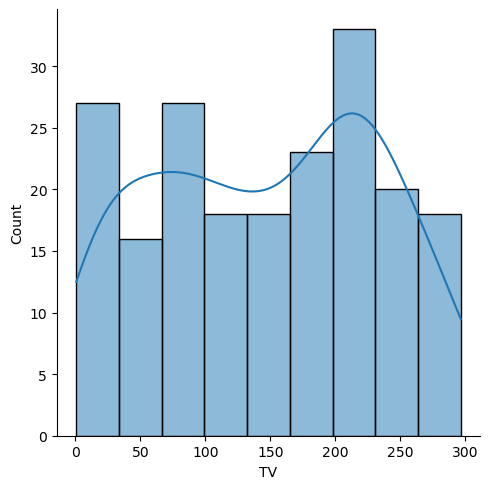

In [14]:
sns.displot(x=data.TV, kde=True)
plt.show()

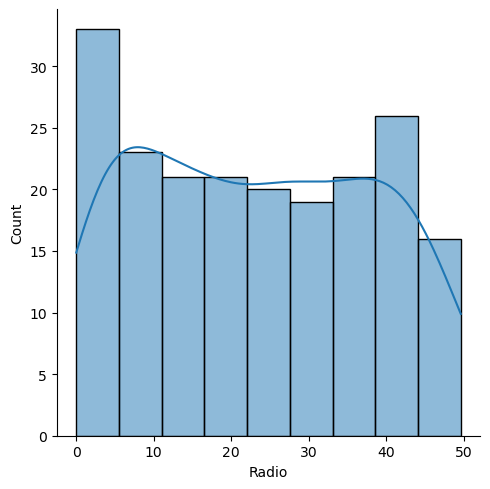

In [15]:
sns.displot(x=data.Radio,kde=True)
plt.show()

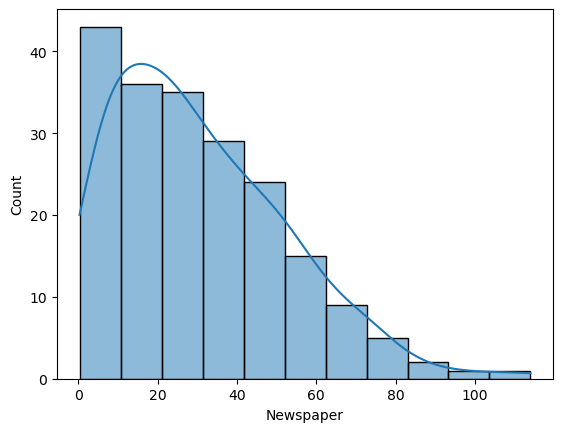

In [16]:
sns.histplot(x=data.Newspaper,kde=True)
plt.show()

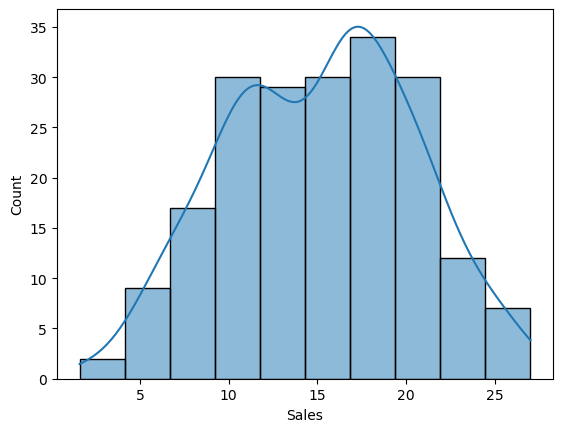

In [17]:
sns.histplot(x=data.Sales,kde=True)
plt.show() #kde=kernal density estimate 

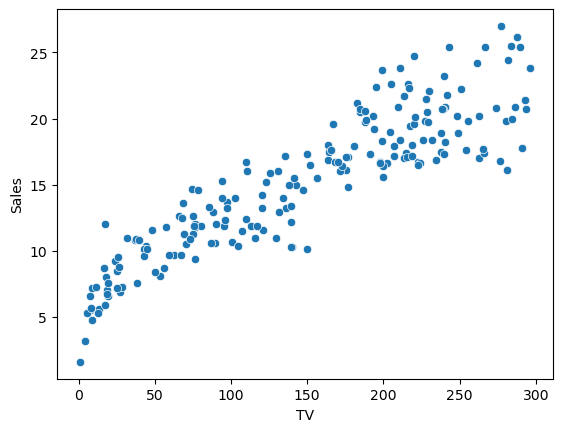

In [18]:
sns.scatterplot(x='TV',y='Sales',data=data)
plt.show()

<Axes: xlabel='Radio', ylabel='Sales'>

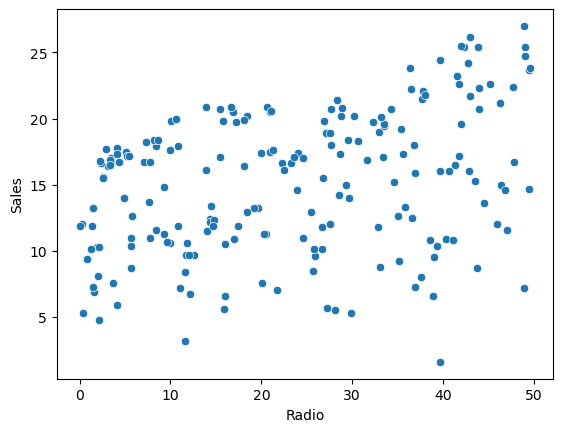

In [19]:
sns.scatterplot(x='Radio',y='Sales',data=data)

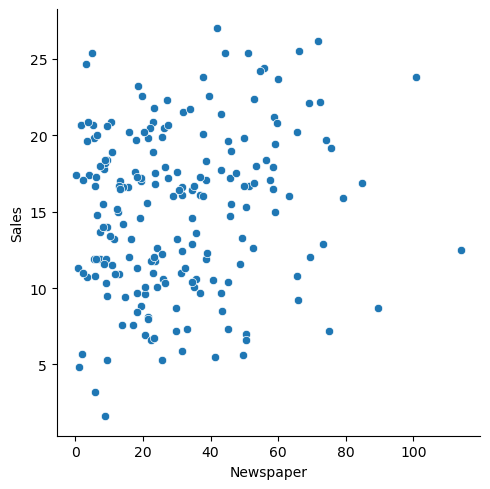

In [20]:
sns.relplot(x='Newspaper',y='Sales',data=data)

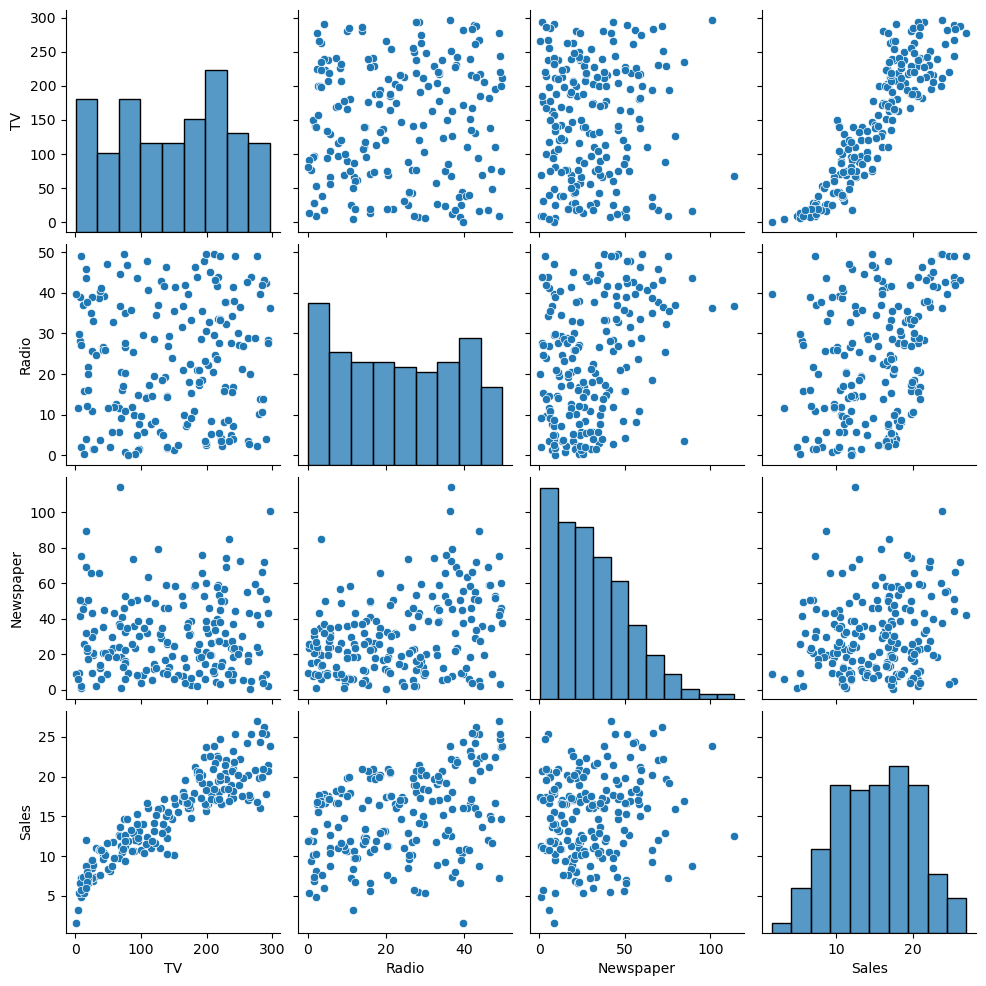

In [21]:
sns.pairplot(data)

In [22]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Data Preprocessing

In [23]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [24]:
data.duplicated().sum()

0

In [25]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<Axes: xlabel='TV'>

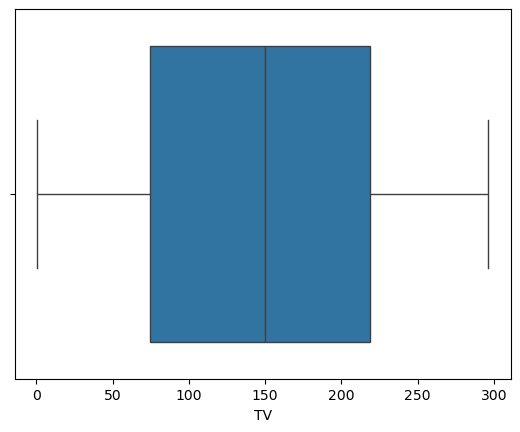

In [26]:
sns.boxplot(x='TV',data=data)

<Axes: xlabel='Radio'>

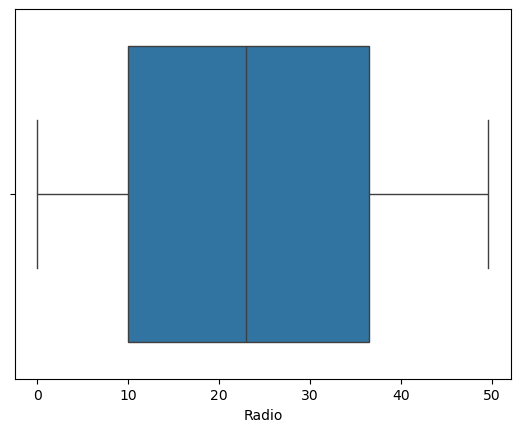

In [27]:
sns.boxplot(x='Radio',data=data)

<Axes: xlabel='Newspaper'>

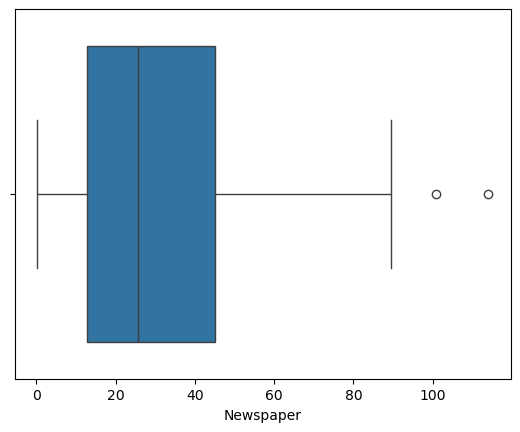

In [28]:
sns.boxplot(x='Newspaper',data=data)

In [33]:
Q1=data['Newspaper'].quantile(0.25)
print('Lower quantile',Q1)
Q3=data['Newspaper'].quantile(0.75)
print('Upper quantile',Q3)

Lower quantile 12.75
Upper quantile 45.1


In [34]:
IQR=Q3-Q1
IQR

32.35

In [35]:
lower_limit=Q1-1.5*IQR
print('Lower limit: ',lower_limit)
upper_limit=Q3+1.5*IQR
print('Upper limit: ',upper_limit)

Lower limit:  -35.775000000000006
Upper limit:  93.625


In [36]:
data.loc[data['Newspaper']>upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [37]:
data.loc[101]

TV           296.4
Radio         36.3
Newspaper    100.9
Sales         23.8
Name: 101, dtype: float64

## Feature Selection

<Axes: >

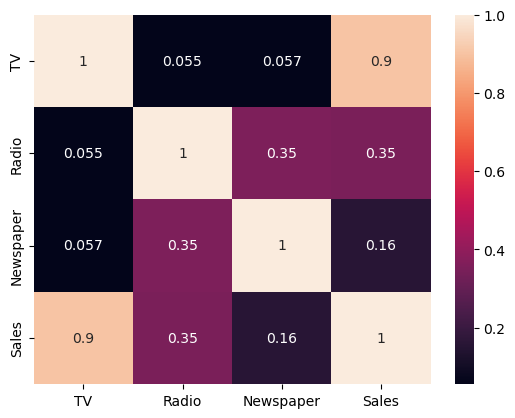

In [38]:
sns.heatmap(data.corr(),annot=True)

In [39]:
X=data[['TV','Radio','Newspaper']]
y=data.Sales

In [40]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [41]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                               random_state=4)

In [43]:
X_train

,TV,Radio,Newspaper
26,142.9,29.3,12.6
134,36.9,38.6,65.6
180,156.6,2.6,8.3
158,11.7,36.9,45.2
189,18.7,12.1,23.4
...,...,...,...
104,238.2,34.3,5.3
129,59.6,12.0,43.1
183,287.6,43.0,71.8
174,222.4,3.4,13.1


In [44]:
X_test

,TV,Radio,Newspaper
11,214.7,24.0,4.0
99,135.2,41.7,45.9
128,220.3,49.0,3.2
175,276.9,48.9,41.8
1,44.5,39.3,45.1
111,241.7,38.0,23.2
90,134.3,4.9,9.3
177,170.2,7.8,35.2
88,88.3,25.5,73.4
187,191.1,28.7,18.2


In [45]:
y_train

26     15.0
134    10.8
180    15.5
158     7.3
189     6.7
       ... 
104    20.7
129     9.7
183    26.2
174    16.5
122    16.6
Name: Sales, Length: 160, dtype: float64

In [46]:
y_test.shape

(40,)

## Model Building

In [47]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression() # object creation
LR.fit(X_train,y_train) # training of model

LinearRegression()

In [48]:
LR

LinearRegression()

In [49]:
y_predict = LR.predict(X_test)
y_predict

array([18.85272242, 16.36312339, 21.74208484, 24.88496644, 11.13264174,
       21.80412938, 12.4697427 , 14.77097657, 12.14529345, 18.05843504,
       23.40251181, 18.2228724 ,  9.84591806, 14.92642582, 20.75130186,
       21.72505269, 21.23086123, 15.82531564,  9.637559  , 20.78403264,
       18.21341551, 21.03432919, 23.04723644,  9.98590098, 22.06142612,
       20.60400085, 15.82038418, 11.15024588, 19.23839783, 10.99866269,
       11.55674727, 10.51616943, 16.4943805 , 16.55447197, 18.12981319,
        7.32067179, 17.29327111, 12.97157856, 17.16687868, 12.12102774])

In [50]:
y_predict=LR.predict(X_train)
y_predict


array([15.46661986, 10.66653923, 13.45578863,  9.08330526,  6.8805905 ,
       15.60457308, 18.74506871, 13.72876394,  9.5857996 , 21.05064994,
       17.89064108, 17.08201043, 12.21288415, 15.15791536, 10.34295113,
       10.95008324, 20.51775229, 10.15411831,  6.00663557,  9.32105664,
       14.15551733,  8.99202057, 10.19259332, 15.38385922, 18.22908601,
       19.40011556, 17.36687428, 13.83545715,  6.34033949, 21.06768342,
       20.0623403 , 12.48603187, 10.84066316, 10.84691779,  6.2760717 ,
       24.72244456, 17.79319094, 12.96645183, 10.37904517, 17.01207246,
       19.49514167, 18.85379851, 15.15921155,  9.32806822,  8.54229669,
       20.97630841,  8.71598739, 18.91164754, 23.56594113, 10.56710776,
       14.57396973, 16.23197241, 22.21108185,  8.28633591,  7.90897482,
       11.43401539, 13.28481946, 13.21659761,  8.83407411, 21.36297193,
       10.72504582, 20.29747778, 11.62663757, 16.83853086,  7.74622969,
       16.92681228, 19.51543622, 24.18749926,  7.12023732,  5.36

In [51]:
y_test.head()

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
Name: Sales, dtype: float64

In [52]:
LR.coef_

array([0.05492414, 0.10330839, 0.00115301])

In [53]:
LR.predict([[1000,300,50]])

array([90.5507996])